In [1]:
:load RaftVisualizer.hs
:load RaftSimulation.hs
:load DSSimulation.hs
:extension NoMonomorphismRestriction
:extension FlexibleContexts
:extension GADTs
import RaftVisualizer
import RaftSimulation
import DSSimulation
import Simulation
import System.Random
import Control.Monad.State
import Diagrams.Prelude
import IHaskell.Display
import IHaskell.Display.Diagrams
import Diagrams.Backend.Cairo
import Data.Colour.Palette.ColorSet
import Data.Sequence
import Data.Ratio

Line 4: Use const
Found:
\ _ -> raftHandler
Why not:
const raftHandler

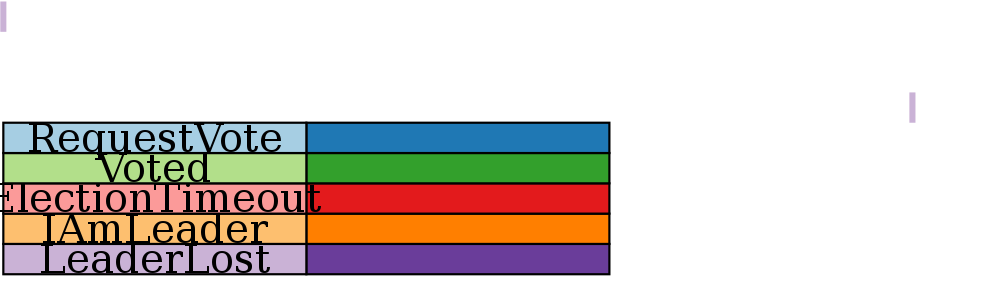

In [2]:
main = do
  randGen <- newStdGen
  
  let s = DSState (DSConf (\_ -> raftHandler) gh cb ns)
                  (fromList (startStates randGen))
                  randGen

  --let t = timelines $ simulateRaft randGen
  let t = timelines [(Event (0%1) (Send 0 LeaderLost), s), (Event (1%1) (Receive 1 0 0 LeaderLost), s)] # connectOutside (0,0) (1,1)
  return $ pad 1.1 t
main


In [ ]:
position [(p2 (5,0), (circle 1 :: Diagram Cairo) # named (0,0)), (p2 (0,0), (circle 1) # named (1,1.0))] # connectOutside (0,0.0) (1,1.0)

In [ ]:
d3 = [d3Colors1 n | n <- [0..9]]

In [ ]:
(bar d3 :: Diagram Cairo)